# Make astro data based on Swiss Ephemeris

In [1]:
%matplotlib inline
import csv
import datetime
import pytz
import swisseph as swe
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.mpl_style', 'default')

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


## Prepare constans

In [2]:
CSV_IN = '../data/polish-police.csv'
CSV_OUT = '../data/polish-police+astro.csv'

utc = pytz.utc
pl_zone = pytz.timezone('Europe/Warsaw')

header = ['Data','Zatrzymani na gorącym uczynku','Zatrzymani poszukiwani','Zatrzymani nietrzeźwi kierujący',
          'Wypadki drogowe', 'Zabici w wypadkach', 'Ranni w wypadkach',
          'Sun', 'Moon',
          'Mercury', 'Mercury speed',
          'Mars', 'Mars speed', 
          'Uran', 'Uran speed',
          'MoonSun distance',
          'MercuryMars distance',
          'SunMars distance',
          'SunUran distance']
rows = []

## Astro calculations and new csv

In [3]:
with open(CSV_IN) as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        localTime = pl_zone.localize(datetime.datetime.strptime(row[0] + ' 12:00', '%d.%m.%Y %H:%M'))
        utcTime = utc.normalize(localTime)
        jd = swe.julday(utcTime.year, utcTime.month, utcTime.day, utcTime.hour + utcTime.minute / 60, 1)
        
        posSun = swe.calc_ut(jd, swe.SUN)[0]
        posMoon = swe.calc_ut(jd, swe.MOON)[0]
        row.append(round(posSun,2))
        row.append(round(posMoon,2))
        
        posMercury = swe.calc_ut(jd, swe.MERCURY)[0]
        speedMercury = swe.calc_ut(jd, swe.MERCURY)[3]
        posMars = swe.calc_ut(jd, swe.MARS)[0]
        speedMars = swe.calc_ut(jd, swe.MARS)[3]  
        posUran = swe.calc_ut(jd, swe.URANUS)[0]
        speedUran = swe.calc_ut(jd, swe.URANUS)[3]
        row.append(round(posMercury,2))
        row.append(round(speedMercury,2))
        row.append(round(posMars,2))
        row.append(round(speedMars,2))
        row.append(round(posUran,2))
        row.append(round(speedUran,2))
        
        disMoonSun = swe.difdeg2n(posMoon, posSun)
        row.append(round(disMoonSun,2))

        distMercuryMars = swe.difdegn(posMercury, posMars)        
        row.append(round(distMercuryMars,2))
        
        disSunMars = swe.difdeg2n(posSun, posMars)
        row.append(round(disSunMars,2))

        disSunUran = swe.difdeg2n(posSun, posUran)
        row.append(round(disSunUran,2))
        
        rows.append(row)

with open(CSV_OUT, "w") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(rows)

In [4]:
df1 = pd.read_csv(CSV_OUT, parse_dates=['Data'], dayfirst=True)
df1
# df1[['Data', 'Sun', 'Moon', 'MoonSun distance', 'Mars', 'Mars speed', 'Uran', 'Uran speed']]

,Data,Zatrzymani na gorącym uczynku,Zatrzymani poszukiwani,Zatrzymani nietrzeźwi kierujący,Wypadki drogowe,Zabici w wypadkach,Ranni w wypadkach,Sun,Moon,Mercury,Mercury speed,Mars,Mars speed,Uran,Uran speed,MoonSun distance,MercuryMars distance,SunMars distance,SunUran distance
0,2016-03-30,581,258,171,70,4,87,10.13,265.98,16.98,2.04,247.05,0.20,19.85,0.06,-104.15,129.93,123.08,-9.72
1,2016-03-29,660,266,267,73,15,100,9.14,253.70,14.94,2.05,246.85,0.21,19.80,0.06,-115.44,128.09,122.30,-10.65
2,2016-03-28,717,133,321,60,6,89,8.15,241.62,12.89,2.04,246.64,0.21,19.74,0.06,-126.54,126.25,121.52,-11.59
3,2016-03-27,482,122,230,38,4,47,7.17,229.67,10.85,2.04,246.42,0.22,19.68,0.06,-137.49,124.43,120.75,-12.52
4,2016-03-26,647,180,267,79,16,107,6.22,218.30,8.90,2.03,246.20,0.23,19.63,0.06,-147.91,122.70,120.01,-13.41
5,2016-03-25,717,302,243,63,2,72,5.23,206.48,6.87,2.02,245.97,0.24,19.58,0.06,-158.75,120.91,119.26,-14.35
6,2016-03-24,636,266,202,67,3,84,4.24,194.65,4.86,2.01,245.72,0.25,19.52,0.06,-169.58,119.14,118.51,-15.28
7,2016-03-23,599,247,161,73,6,84,3.25,182.78,2.86,1.99,245.47,0.26,19.46,0.06,179.54,117.39,117.77,-16.22
8,2016-03-22,646,220,183,95,7,132,2.25,170.84,0.88,1.98,245.21,0.26,19.41,0.06,168.59,115.66,117.04,-17.15
9,2016-03-21,665,221,197,57,3,74,1.26,158.80,358.91,1.96,244.95,0.27,19.35,0.05,157.53,113.96,116.31,-18.09


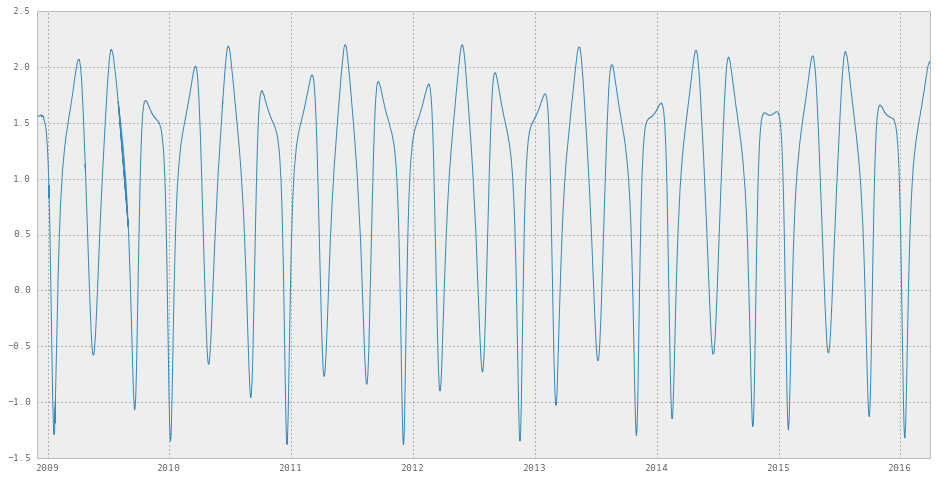

In [5]:
plt.figure(1,figsize=[16,8], dpi=144)
plt.plot(df1['Data'], df1['Mercury speed'])